Column Names in DataFrame:
Index(['Messages'], dtype='object')
First few rows of the DataFrame:
                                            Messages
0  "Great,service!,The,staff,was,very,helpful,and...
1  "I,had,a,bad,experience,with,the,customer,supp...
2  "The,new,update,is,excellent,and,improves,"usa...
3  "Received,a,defective,product.,The,quality,is,...
4  "Good,value,for,money.,I'm,satisfied,with,the,...
Total number of feedback entries: 110
Feedback Entry 2: Keywords found - excellent
Feedback Entry 3: Keywords found - poor, bad
Feedback Entry 4: Keywords found - excellent
Feedback Entry 5: Keywords found - poor, bad
Feedback Entry 6: Keywords found - good
Feedback Entry 7: Keywords found - excellent
Feedback Entry 8: Keywords found - good
Feedback Entry 9: Keywords found - bad
Feedback Entry 10: Keywords found - good, excellent
Feedback Entry 11: Keywords found - poor
Feedback Entry 12: Keywords found - good, excellent
Feedback Entry 13: Keywords found - poor
Feedback Entry 14:

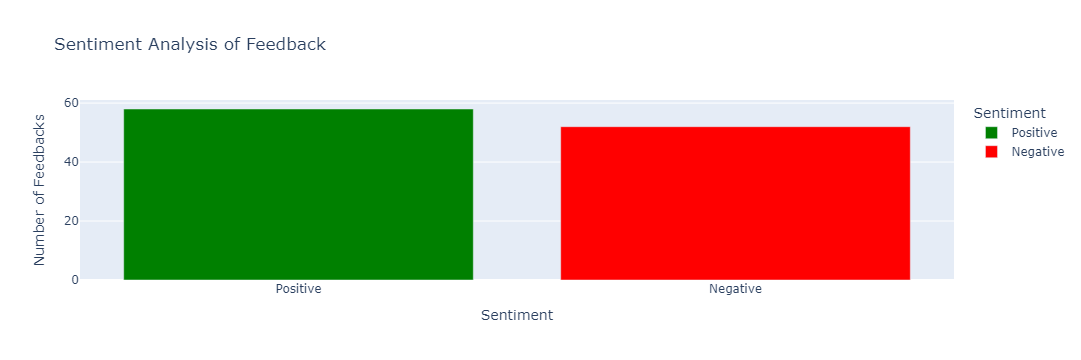

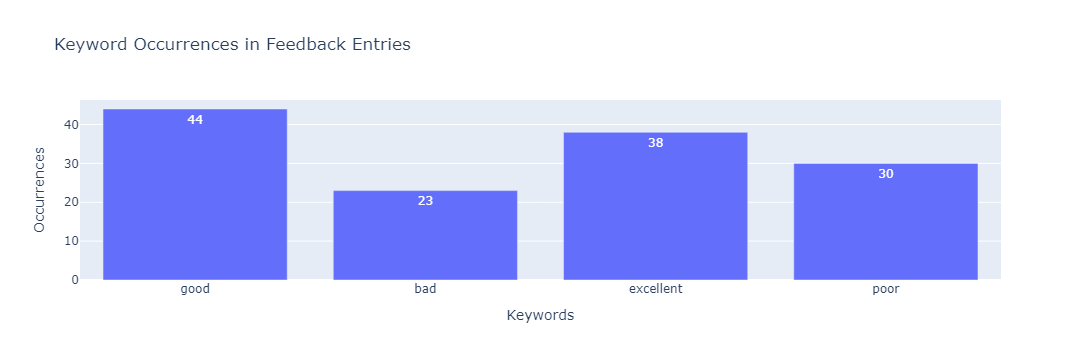

Summary Report:
Total Number of Feedback Entries: 110

Keyword Occurrences:
  'good': 44 occurrences
  'bad': 23 occurrences
  'excellent': 38 occurrences
  'poor': 30 occurrences

Summary report has been saved to 'summary_report.txt'.


In [27]:
import pandas as pd
from collections import defaultdict
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

df = pd.read_csv(r'Customer_Feedback.csv', sep=",", quotechar='"', on_bad_lines='skip')
print("Column Names in DataFrame:")
print(df.columns)
print("First few rows of the DataFrame:")
print(df.head())

file_path = 'feedback.txt'

line_count = 0

with open(file_path, 'r') as file:
    for line in file:
        line_count += 1  

print(f'Total number of feedback entries: {line_count}')

keywords = ["good", "bad", "excellent", "poor"]

feedback_keywords = []

with open(file_path, 'r') as file:
    for line_num, line in enumerate(file, 1):
        
        feedback_lower = line.lower()
        
        found_keywords = set()
        
        for keyword in keywords:
            if keyword in feedback_lower:
                found_keywords.add(keyword)
        if found_keywords:
            feedback_keywords.append((line_num, list(found_keywords)))

for entry in feedback_keywords:
    line_num, found = entry
    print(f"Feedback Entry {line_num}: Keywords found - {', '.join(found)}")

keyword_count = defaultdict(int)
with open(file_path, 'r') as file:
    for line in file:
        feedback_lower = line.lower()

        for keyword in keywords:
            keyword_count[keyword] += feedback_lower.count(keyword)

for keyword in keywords:
    print(f"'{keyword}': {keyword_count[keyword]} occurrences")

keyword_list = list(keyword_count.keys())
count_list = list(keyword_count.values())

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_dict = analyzer.polarity_scores(text)
    compound = sentiment_dict['compound']
    
    accuracy = (compound) * 100
    
    if compound >= 0.30:
        sentiment = 'Positive'
    elif compound < 0.30:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
        
    return sentiment, accuracy

with open('feedback.txt', 'r') as file:
    feedback_list = file.readlines()

feedback_sentiment = []
for feedback in feedback_list:
    sentiment, accuracy = get_sentiment(feedback)
    feedback_sentiment.append({'Feedback': feedback.strip(), 'Sentiment': sentiment, 'Accuracy (%)': round(accuracy, 2)})

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

df = pd.DataFrame(feedback_sentiment)
print(df)


df.to_csv('feedback_sentiment_analysis.csv', index=False)

sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.bar(sentiment_counts, x='Sentiment', y='Count', 
             color='Sentiment', 
             title='Sentiment Analysis of Feedback',
             labels={'Count': 'Number of Feedbacks'},
             color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
fig.show()

fig = px.bar(
    x=keyword_list,
    y=count_list,
    labels={'x': 'Keywords', 'y': 'Occurrences'},
    title="Keyword Occurrences in Feedback Entries",
    text_auto=True)

fig.show()

keywords = ["good", "bad", "excellent", "poor"]

keyword_count = defaultdict(int)
total_entries = 0

with open(file_path, 'r') as file:
    for line in file:
        total_entries += 1 
        
        feedback_lower = line.lower()

        for keyword in keywords:
            keyword_count[keyword] += feedback_lower.count(keyword)          
print("Summary Report:")
print(f"Total Number of Feedback Entries: {total_entries}\n")

print("Keyword Occurrences:")
for keyword in keywords:
    print(f"  '{keyword}': {keyword_count[keyword]} occurrences")
with open('summary_report.txt', 'w') as report_file:
    report_file.write("Summary Report:\n")
    report_file.write(f"Total Number of Feedback Entries: {total_entries}\n\n")
    report_file.write(f"Sentiment_Analysis: {feedback_sentiment}\n\n")
    report_file.write("Keyword Occurrences:\n")
    for keyword in keywords:
        report_file.write(f"  '{keyword}': {keyword_count[keyword]} occurrences\n")

print("\nSummary report has been saved to 'summary_report.txt'.")